In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_2018=pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\energy-2018.csv')
df_2017=pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\energy-2017.csv')
df_2016=pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\energy-2016.csv')
df_feat = pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\energy.csv')


In [3]:
col_2019=df_feat.iloc[:,21:24].columns
col_2018=df_2018.iloc[:,21:24].columns
col_2017=df_2017.iloc[:,21:24].columns
col_2016=df_2016.iloc[:,21:24].columns

In [4]:
df_feat = df_feat.drop(columns=col_2019) 
df_2018=df_2018.drop(columns=col_2018)
df_2017=df_2017.drop(columns=col_2017)
df_2016=df_2016.drop(columns=col_2016)



In [5]:
df_feat = df_feat.drop(columns='5 Year Energy Action and Assessment Compliance Status') 


In [6]:
a,b,c,d=[],[],[],[]
a=df_feat.columns
b=df_2018.columns
c=df_2017.columns
d=df_2016.columns
dictum={'2019':a,'2018':b,'2017':c,'2016':d}
df = pd.DataFrame.from_dict(dictum, orient='index')
df.transpose()

,2019,2018,2017,2016
0,Property Name,Property Name,Property Name,Property Name
1,Reported,Reported,Reported,Reported
2,Property Type,Property Type,Property Type,Property Type
3,Address,Address,Address,Address
4,ZIP,ZIP,ZIP,ZIP
5,Gross Area (sq ft),Gross Area (sq ft),Gross Area (sq ft),Gross Area (sq ft)
6,Site EUI (kBTU/sf),Site EUI (kBTU/sf),Site EUI (kBTU/sf),Site EUI (kBTU/sf)
7,Energy Star Score,Energy Star Score,Energy Star Score,Energy Star Score
8,Energy Star Certified,Energy Star Certified,Energy Star Certified,Energy Star Certified
9,Property Uses,Property Uses,Property Uses,Property Uses


In [7]:
df_combine=pd.concat([df_feat,df_2018,df_2017,df_2016],sort=False)


In [8]:
df_combine.index=range(6560)

In [9]:
df_combine.to_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\Combine.csv')

In [10]:
drop_col=[]
drop_col.append(df_combine.iloc[:,[0,1,2,3,4,8,9,10,16,18,19,20,21,22,23]].columns)
drop_col

[Index(['Property Name', 'Reported', 'Property Type', 'Address', 'ZIP',
        'Energy Star Certified', 'Property Uses', 'Year Built', '% Steam',
        ' Onsite Renewable (kWh) ', 'User Submitted Info',
        'User Submitted Link', 'Gross Area (sq ft)', 'GHG Emissions (MTCO2e)',
        'Onsite Solar (kWh)'],
       dtype='object')]

In [11]:
df_combine=df_combine.drop(columns=df_combine.iloc[:,[0,1,2,3,4,8,9,10,21,16,18,19,20,22,23]].columns)

In [12]:
df_combine=df_combine.dropna()

In [25]:
#df_feat.iloc[:,3]=df_feat.iloc[:,3].astype('object')

X=df_combine.drop(columns='Energy Star Score')
df_combine.columns

Index([' Gross Area (sq ft) ', 'Site EUI (kBTU/sf)', 'Energy Star Score',
       ' GHG Emissions (MTCO2e) ', 'GHG Intensity (kgCO2/sf)',
       ' Total Site Energy (kBTU) ', '% Electricity', '% Gas',
       'Water Intensity (gal/sf)'],
      dtype='object')

In [14]:
y=df_combine.iloc[:,2]
y=y.astype('int32')


In [15]:
X.iloc[:,-1]=X.iloc[:,-1].apply(lambda x:0 if x=='Not Available' else x)

In [16]:
X.iloc[:,-1]=pd.to_numeric(X.iloc[:,-1])


In [17]:
X.head(3)

,Gross Area (sq ft),Site EUI (kBTU/sf),GHG Emissions (MTCO2e),GHG Intensity (kgCO2/sf),Total Site Energy (kBTU),% Electricity,% Gas,Water Intensity (gal/sf)
0,123596,86.8,696.5,5.6,10733299,0.497101,0.460182,5.52
1,130520,69.6,590.3,4.5,9085993,0.49998,0.457056,5.99
2,42918,251.9,1019.8,17.1,14993662.6,0.628841,0.317121,0.00


In [18]:
for i in range(len(X.columns)):
     print(i,X.iloc[:,i].dtypes)

0 object
1 object
2 object
3 object
4 object
5 object
6 object
7 float64


In [19]:
X.iloc[:,5]=X.iloc[:,5].apply(lambda x: 0 if x == '#DIV/0' else x)
X.iloc[:,6]=X.iloc[:,6].apply(lambda x: 0 if x == '#DIV/0' else x)

In [20]:
for i in range(len(X.columns)):
     X.iloc[:,i]=X.iloc[:,i].astype('float')
     print(i,X.iloc[:,i].dtypes)

0 float64
1 float64
2 float64
3 float64
4 float64
5 float64
6 float64
7 float64


In [21]:
X.describe()

,Gross Area (sq ft),Site EUI (kBTU/sf),GHG Emissions (MTCO2e),GHG Intensity (kgCO2/sf),Total Site Energy (kBTU),% Electricity,% Gas,Water Intensity (gal/sf)
count,1.906000e+03,1906.000000,1.906000e+03,1906.000000,1.906000e+03,1906.000000,1906.000000,1.906000e+03
mean,1.614648e+05,414.998688,1.672102e+03,27.132489,2.682264e+07,0.366933,0.578424,1.501656e+04
std,2.562886e+05,13319.465910,2.608905e+04,884.501048,3.942956e+08,0.227698,0.267033,3.762485e+05
min,7.200000e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,4.450800e+04,54.850000,1.830250e+02,3.400000,3.028352e+06,0.178089,0.396815,8.460000e+00
50%,8.013850e+04,70.900000,3.676500e+02,4.400000,5.957904e+06,0.320326,0.638255,2.688500e+01
75%,1.710350e+05,94.475000,8.298500e+02,5.800000,1.324854e+07,0.515545,0.801994,4.550750e+01
max,3.912529e+06,579540.100000,1.098619e+06,38485.100000,1.654579e+10,0.999740,0.999006,1.058521e+07


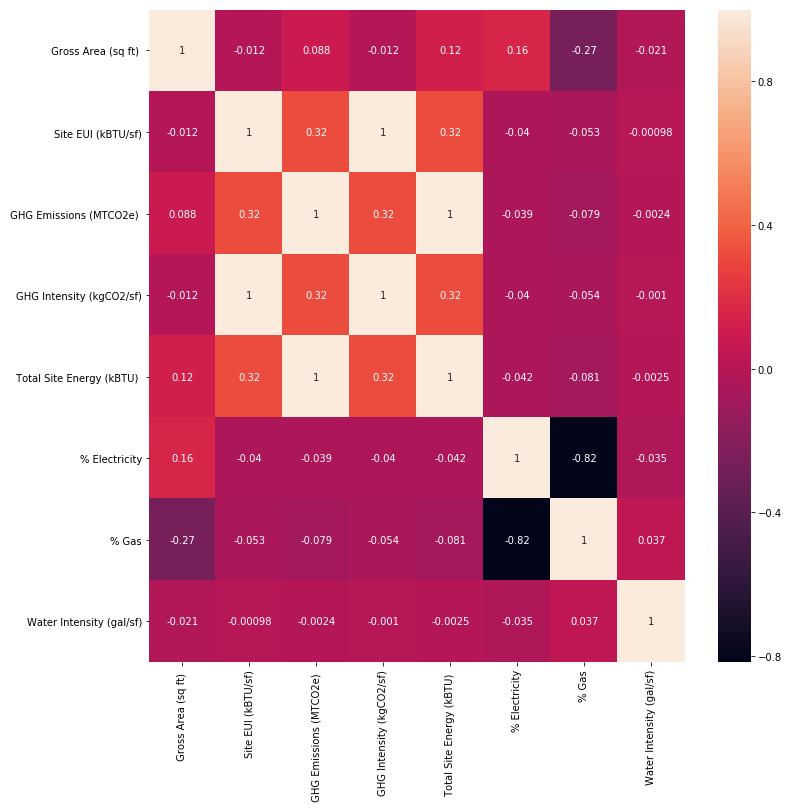

In [22]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True)

In [23]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_transform= sc.fit_transform(X)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.30, random_state=101)

In [84]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

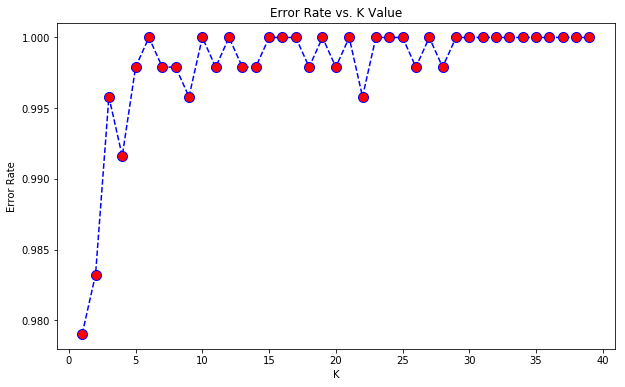

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# NOW WITH K=23
from sklearn.metrics import confusion_matrix,classification_report

knn = KNeighborsRegressor(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.04895104895104895


In [39]:
from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, pred))
#print('MSE:', metrics.mean_squared_error(y_test, pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 33.88986013986014
MSE: 1911.2395104895104
RMSE: 43.71772535813718


In [87]:
acc=[]
mse=[]
rmse=[]
mae=[]
for i in range(1,41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    #print('K value is {} and Accuracy is:{}'.format(i,accuracy_score(y_test,pred)))
    #acc.append(accuracy_score(y_test,pred))
    mae.append(metrics.mean_absolute_error(y_test, pred))
    mse.append(metrics.mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [90]:
for i in range(1,41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print(metrics.mean_squared_error(y_test, pred))

1732.25786163522
1240.3836477987422
1142.6049382716049
1031.4261006289307
1006.5962264150944
990.9084556254368
955.5072091729774
937.0088770964361
942.944069156508
940.2662893081762
932.8350919139941
927.2850570696484
926.7421135548856
917.621978351089
914.5175401816911
918.6525402908806
914.0646775913473
911.927362372855
914.6996347206978
913.4121016771488
921.3574019405107
923.1422068021554
925.0271744084207
924.1500007279291
925.9448486373166
926.1550153201098
921.8169141266432
920.4733399649168
914.9570043648746
912.2232285115304
911.571186111602
913.6638516280136
912.8918747220634
911.9500246639536
911.3244718264663
910.8005765199161
908.7157284770747
906.0366440762615
902.5386999891111
902.3461176624738


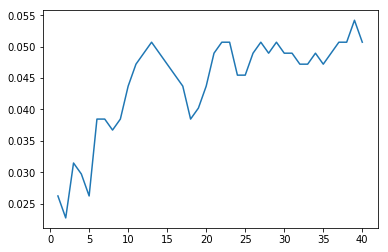

In [50]:
plt.plot(range(1,41),acc)

In [89]:
np.min(mse),np.min(mae),np.min(rmse)

(902.3461176624738, 24.981394129979037, 30.03907651147874)

In [31]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.064, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.060, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.064, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.060, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.060, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.060, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.064, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.060, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.064, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.060, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.060, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.064, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   32.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [27]:
prediction=grid.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.05244755244755245


In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.48076923076923
MSE: 2386.6975524475524
RMSE: 48.85383866645028


In [56]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_Grad=model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction_Grad))

0.07966457023060797


In [62]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)


In [63]:
#for train, test in kf.split(X):
#     grid.fit(X_transform[train], y[train])
y=y.astype('category')

In [64]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X_transform):
    X_train, y_train, X_test, y_test=X_transform[train_index],y.iloc[train_index],X_transform[test_index],y.iloc[test_index]
    grid.fit(X_train,y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.056, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.056, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.056, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.056, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.056, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.059, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.060, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.056, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.056, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.0min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.056, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.056, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.056, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.056, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.056, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.056, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.056, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.056, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.056, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.056, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   42.3s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.059, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.060, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.0min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.063, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.060, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.063, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.063, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.060, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.059, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.060, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.063, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.060, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.0min finished


In [66]:
predict_Kfold=grid.predict(X_test)

In [67]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,predict_Kfold)

array([[[448,  13],
        [ 15,   1]],

       [[473,   0],
        [  4,   0]],

       [[474,   0],
        [  3,   0]],

       [[474,   0],
        [  3,   0]],

       [[475,   0],
        [  2,   0]],

       [[474,   0],
        [  3,   0]],

       [[475,   0],
        [  2,   0]],

       [[475,   0],
        [  2,   0]],

       [[475,   0],
        [  2,   0]],

       [[475,   0],
        [  2,   0]],

       [[473,   0],
        [  4,   0]],

       [[475,   0],
        [  2,   0]],

       [[472,   0],
        [  5,   0]],

       [[472,   0],
        [  5,   0]],

       [[474,   0],
        [  3,   0]],

       [[475,   0],
        [  2,   0]],

       [[475,   0],
        [  2,   0]],

       [[475,   1],
        [  1,   0]],

       [[475,   0],
        [  2,   0]],

       [[472,   0],
        [  5,   0]],

       [[473,   0],
        [  4,   0]],

       [[474,   0],
        [  3,   0]],

       [[473,   2],
        [  2,   0]],

       [[472,   0],
        [  5, 

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict_Kfold))
print('MSE:', metrics.mean_squared_error(y_test, predict_Kfold))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_Kfold)))

MAE: 36.9937106918239
MSE: 2273.2159329140463
RMSE: 47.678254298097436


In [106]:
df=pd.DataFrame({'Actual Values':y_test,'Predictions':predict_Kfold})

In [117]:
#df.as_matrix()


dtype('int32')

In [69]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_transform,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
prediction=lm.predict(X_test)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.38154825035872
MSE: 868.7539694779532
RMSE: 29.4746326436472


In [90]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((652, 8), (652, 1), (280, 8), (280, 1))

In [72]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.utils import Sequence, to_categorical
from keras.regularizers import l2
from keras.callbacks import (EarlyStopping, LearningRateScheduler, ModelCheckpoint)

Using TensorFlow backend.


In [176]:
y_=y.values.reshape(-1,1)
y_=to_categorical(y_)
from keras.models import Sequential
nClasses = len(np.unique(y.values))
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_, test_size=0.30, random_state=101)

In [177]:
filepath=r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\energy.h5'
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='auto')
#early = EarlyStopping(monitor="acc", mode="auto", patience= 10)
callbacks_list = [checkpoint]

In [178]:
# create model
model = Sequential()
model.add(Dense(256, input_dim = 8, activation='relu'))
# model.add(Dense(144, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(101, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', metrics=['acc'],optimizer='adam')
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_26 (Dense)             (None, 101)               25957     
Total params: 28,261
Trainable params: 28,261
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.models import model_from_json

model.load_weights(filepath)

Using TensorFlow backend.


AttributeError: 'GradientBoostingClassifier' object has no attribute 'load_weights'

In [195]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X_transform):
    X_train, y_train, X_test, y_test=X_transform[train_index],y_[train_index],X_transform[test_index],y_[test_index] 
    history=model.fit(X_train,y_train,callbacks=callbacks_list,epochs=500,batch_size=32,validation_data=(X_test,y_test))

Train on 1429 samples, validate on 477 samples
Epoch 1/500
1429/1429 [==============================] - 0s 128us/step - loss: 3.2654 - accuracy: 0.2533 - val_loss: 3.4693 - val_accuracy: 0.2327
Epoch 2/500
1429/1429 [==============================] - 0s 109us/step - loss: 3.1991 - accuracy: 0.2624 - val_loss: 3.4819 - val_accuracy: 0.2201
Epoch 3/500
  32/1429 [..............................] - ETA: 0s - loss: 2.7852 - accuracy: 0.3438

C:\Users\Kanishk\AppData\Roaming\Python\Python36\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1429/1429 [==============================] - 0s 107us/step - loss: 3.1694 - accuracy: 0.2596 - val_loss: 3.5043 - val_accuracy: 0.2222
Epoch 4/500
1429/1429 [==============================] - 0s 113us/step - loss: 3.1308 - accuracy: 0.2631 - val_loss: 3.5302 - val_accuracy: 0.2117
Epoch 5/500
1429/1429 [==============================] - 0s 126us/step - loss: 3.1034 - accuracy: 0.2547 - val_loss: 3.5170 - val_accuracy: 0.2075
Epoch 6/500
1429/1429 [==============================] - 0s 110us/step - loss: 3.0932 - accuracy: 0.2687 - val_loss: 3.5281 - val_accuracy: 0.2034
Epoch 7/500
1429/1429 [==============================] - 0s 109us/step - loss: 3.0771 - accuracy: 0.2624 - val_loss: 3.5436 - val_accuracy: 0.1950
Epoch 8/500
1429/1429 [==============================] - 0s 143us/step - loss: 3.0575 - accuracy: 0.2582 - val_loss: 3.5627 - val_accuracy: 0.2055
Epoch 9/500
1429/1429 [==============================] - 0s 114us/step - loss: 3.0504 - accuracy: 0.2694 - val_loss: 3.5604 - val_

1429/1429 [==============================] - 0s 110us/step - loss: 2.7967 - accuracy: 0.2925 - val_loss: 4.0008 - val_accuracy: 0.1384
Epoch 114/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.8025 - accuracy: 0.3009 - val_loss: 3.9912 - val_accuracy: 0.1342
Epoch 115/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.8067 - accuracy: 0.3002 - val_loss: 4.0044 - val_accuracy: 0.1258
Epoch 116/500
1429/1429 [==============================] - 0s 116us/step - loss: 2.7973 - accuracy: 0.3086 - val_loss: 4.0117 - val_accuracy: 0.1321
Epoch 117/500
1429/1429 [==============================] - 0s 124us/step - loss: 2.7931 - accuracy: 0.3107 - val_loss: 4.0135 - val_accuracy: 0.1300
Epoch 118/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.7996 - accuracy: 0.3023 - val_loss: 4.0310 - val_accuracy: 0.1132
Epoch 119/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.7925 - accuracy: 0.2939 - val_loss: 4

1429/1429 [==============================] - 0s 105us/step - loss: 2.7595 - accuracy: 0.3072 - val_loss: 4.2077 - val_accuracy: 0.1132
Epoch 169/500
1429/1429 [==============================] - 0s 131us/step - loss: 2.7551 - accuracy: 0.3107 - val_loss: 4.1839 - val_accuracy: 0.1405
Epoch 170/500
1429/1429 [==============================] - 0s 127us/step - loss: 2.7547 - accuracy: 0.3100 - val_loss: 4.1948 - val_accuracy: 0.1237
Epoch 171/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.7521 - accuracy: 0.3163 - val_loss: 4.1917 - val_accuracy: 0.1321
Epoch 172/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.7505 - accuracy: 0.3072 - val_loss: 4.1879 - val_accuracy: 0.1258
Epoch 173/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.7513 - accuracy: 0.3051 - val_loss: 4.2077 - val_accuracy: 0.1363
Epoch 174/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.7561 - accuracy: 0.3079 - val_loss: 4.

1429/1429 [==============================] - 0s 114us/step - loss: 2.7304 - accuracy: 0.3212 - val_loss: 4.3842 - val_accuracy: 0.1216
Epoch 224/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.7256 - accuracy: 0.3212 - val_loss: 4.4002 - val_accuracy: 0.1195
Epoch 225/500
1429/1429 [==============================] - 0s 116us/step - loss: 2.7288 - accuracy: 0.3198 - val_loss: 4.4026 - val_accuracy: 0.1258
Epoch 226/500
1429/1429 [==============================] - 0s 117us/step - loss: 2.7257 - accuracy: 0.3142 - val_loss: 4.4162 - val_accuracy: 0.1069
Epoch 227/500
1429/1429 [==============================] - 0s 118us/step - loss: 2.7254 - accuracy: 0.3149 - val_loss: 4.3877 - val_accuracy: 0.1279
Epoch 228/500
1429/1429 [==============================] - 0s 116us/step - loss: 2.7253 - accuracy: 0.3107 - val_loss: 4.3955 - val_accuracy: 0.1195
Epoch 229/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.7189 - accuracy: 0.3086 - val_loss: 4

1429/1429 [==============================] - 0s 112us/step - loss: 2.7013 - accuracy: 0.3282 - val_loss: 4.6022 - val_accuracy: 0.1300
Epoch 279/500
1429/1429 [==============================] - 0s 111us/step - loss: 2.7097 - accuracy: 0.3233 - val_loss: 4.6291 - val_accuracy: 0.1153
Epoch 280/500
1429/1429 [==============================] - 0s 116us/step - loss: 2.7298 - accuracy: 0.3163 - val_loss: 4.6186 - val_accuracy: 0.1216
Epoch 281/500
1429/1429 [==============================] - 0s 119us/step - loss: 2.6971 - accuracy: 0.3247 - val_loss: 4.6276 - val_accuracy: 0.1048
Epoch 282/500
1429/1429 [==============================] - 0s 117us/step - loss: 2.7100 - accuracy: 0.3163 - val_loss: 4.6091 - val_accuracy: 0.1153
Epoch 283/500
1429/1429 [==============================] - 0s 119us/step - loss: 2.7258 - accuracy: 0.3205 - val_loss: 4.6021 - val_accuracy: 0.1195
Epoch 284/500
1429/1429 [==============================] - 0s 119us/step - loss: 2.7133 - accuracy: 0.3226 - val_loss: 4

1429/1429 [==============================] - 0s 110us/step - loss: 2.6733 - accuracy: 0.3268 - val_loss: 4.8278 - val_accuracy: 0.1153
Epoch 334/500
1429/1429 [==============================] - 0s 123us/step - loss: 2.6787 - accuracy: 0.3184 - val_loss: 4.8426 - val_accuracy: 0.1132
Epoch 335/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.6707 - accuracy: 0.3254 - val_loss: 4.8430 - val_accuracy: 0.1174
Epoch 336/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.6735 - accuracy: 0.3282 - val_loss: 4.8352 - val_accuracy: 0.1090
Epoch 337/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6760 - accuracy: 0.3268 - val_loss: 4.8395 - val_accuracy: 0.1111
Epoch 338/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.6707 - accuracy: 0.3289 - val_loss: 4.8336 - val_accuracy: 0.1111
Epoch 339/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.6772 - accuracy: 0.3219 - val_loss: 4.84

1429/1429 [==============================] - 0s 102us/step - loss: 2.6368 - accuracy: 0.3289 - val_loss: 5.2782 - val_accuracy: 0.1111
Epoch 444/500
1429/1429 [==============================] - 0s 97us/step - loss: 2.6366 - accuracy: 0.3296 - val_loss: 5.2892 - val_accuracy: 0.1069
Epoch 445/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.6363 - accuracy: 0.3331 - val_loss: 5.2923 - val_accuracy: 0.1174
Epoch 446/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.6385 - accuracy: 0.3247 - val_loss: 5.2808 - val_accuracy: 0.0985
Epoch 447/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6406 - accuracy: 0.3324 - val_loss: 5.3010 - val_accuracy: 0.1090
Epoch 448/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.6362 - accuracy: 0.3282 - val_loss: 5.2812 - val_accuracy: 0.1111
Epoch 449/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.6342 - accuracy: 0.3359 - val_loss: 5.

1429/1429 [==============================] - 0s 102us/step - loss: 2.8814 - accuracy: 0.3030 - val_loss: 3.8527 - val_accuracy: 0.1656
Epoch 54/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.8850 - accuracy: 0.3023 - val_loss: 3.8723 - val_accuracy: 0.1656
Epoch 55/500
1429/1429 [==============================] - 0s 93us/step - loss: 2.8883 - accuracy: 0.3016 - val_loss: 3.8577 - val_accuracy: 0.1761
Epoch 56/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.8783 - accuracy: 0.2995 - val_loss: 3.8600 - val_accuracy: 0.1551
Epoch 57/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.8763 - accuracy: 0.3002 - val_loss: 3.8632 - val_accuracy: 0.1761
Epoch 58/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.8734 - accuracy: 0.3044 - val_loss: 3.8729 - val_accuracy: 0.1719
Epoch 59/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.8726 - accuracy: 0.2981 - val_loss: 3.8757 - v

1429/1429 [==============================] - 0s 100us/step - loss: 2.7303 - accuracy: 0.3135 - val_loss: 4.2039 - val_accuracy: 0.1342
Epoch 164/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.7313 - accuracy: 0.3177 - val_loss: 4.1889 - val_accuracy: 0.1363
Epoch 165/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.7294 - accuracy: 0.3233 - val_loss: 4.1958 - val_accuracy: 0.1426
Epoch 166/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.7356 - accuracy: 0.3191 - val_loss: 4.2080 - val_accuracy: 0.1530
Epoch 167/500
1429/1429 [==============================] - 0s 108us/step - loss: 2.7232 - accuracy: 0.3142 - val_loss: 4.2204 - val_accuracy: 0.1405
Epoch 168/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.7233 - accuracy: 0.3240 - val_loss: 4.2144 - val_accuracy: 0.1363
Epoch 169/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.7248 - accuracy: 0.3163 - val_loss: 4.

1429/1429 [==============================] - 0s 108us/step - loss: 2.6558 - accuracy: 0.3184 - val_loss: 4.5736 - val_accuracy: 0.1321
Epoch 274/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.6567 - accuracy: 0.3324 - val_loss: 4.6041 - val_accuracy: 0.1174
Epoch 275/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.6622 - accuracy: 0.3268 - val_loss: 4.6128 - val_accuracy: 0.1216
Epoch 276/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.6538 - accuracy: 0.3303 - val_loss: 4.6002 - val_accuracy: 0.1279
Epoch 277/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.6523 - accuracy: 0.3282 - val_loss: 4.5974 - val_accuracy: 0.1321
Epoch 278/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.6606 - accuracy: 0.3247 - val_loss: 4.6100 - val_accuracy: 0.1237
Epoch 279/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.6535 - accuracy: 0.3296 - val_loss: 4.62

1429/1429 [==============================] - 0s 102us/step - loss: 2.6075 - accuracy: 0.3310 - val_loss: 5.0165 - val_accuracy: 0.1153
Epoch 384/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6153 - accuracy: 0.3338 - val_loss: 4.9738 - val_accuracy: 0.1321
Epoch 385/500
1429/1429 [==============================] - 0s 111us/step - loss: 2.6086 - accuracy: 0.3380 - val_loss: 4.9886 - val_accuracy: 0.1258
Epoch 386/500
1429/1429 [==============================] - 0s 114us/step - loss: 2.6118 - accuracy: 0.3352 - val_loss: 5.0010 - val_accuracy: 0.1132
Epoch 387/500
1429/1429 [==============================] - 0s 106us/step - loss: 2.6060 - accuracy: 0.3303 - val_loss: 5.0131 - val_accuracy: 0.1111
Epoch 388/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6203 - accuracy: 0.3499 - val_loss: 5.0055 - val_accuracy: 0.1258
Epoch 389/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6288 - accuracy: 0.3289 - val_loss: 5

1429/1429 [==============================] - 0s 92us/step - loss: 2.5712 - accuracy: 0.3478 - val_loss: 5.3567 - val_accuracy: 0.1216
Epoch 494/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.5714 - accuracy: 0.3443 - val_loss: 5.3806 - val_accuracy: 0.1069
Epoch 495/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.5688 - accuracy: 0.3408 - val_loss: 5.3857 - val_accuracy: 0.1132
Epoch 496/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.5797 - accuracy: 0.3331 - val_loss: 5.3693 - val_accuracy: 0.1111
Epoch 497/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.5685 - accuracy: 0.3380 - val_loss: 5.3794 - val_accuracy: 0.1174
Epoch 498/500
1429/1429 [==============================] - 0s 141us/step - loss: 2.5675 - accuracy: 0.3450 - val_loss: 5.3918 - val_accuracy: 0.1090
Epoch 499/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.5768 - accuracy: 0.3387 - val_loss: 5.3

1429/1429 [==============================] - 0s 103us/step - loss: 2.7535 - accuracy: 0.3184 - val_loss: 4.1577 - val_accuracy: 0.1342
Epoch 104/500
1429/1429 [==============================] - 0s 143us/step - loss: 2.7560 - accuracy: 0.3107 - val_loss: 4.1482 - val_accuracy: 0.1426
Epoch 105/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.7509 - accuracy: 0.3156 - val_loss: 4.1605 - val_accuracy: 0.1468
Epoch 106/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.7480 - accuracy: 0.3268 - val_loss: 4.1505 - val_accuracy: 0.1426
Epoch 107/500
1429/1429 [==============================] - 0s 97us/step - loss: 2.7389 - accuracy: 0.3177 - val_loss: 4.1673 - val_accuracy: 0.1258
Epoch 108/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.7429 - accuracy: 0.3114 - val_loss: 4.1696 - val_accuracy: 0.1468
Epoch 109/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.7457 - accuracy: 0.3191 - val_loss: 4.1

1429/1429 [==============================] - 0s 104us/step - loss: 2.6635 - accuracy: 0.3387 - val_loss: 4.6109 - val_accuracy: 0.1216
Epoch 214/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.6611 - accuracy: 0.3275 - val_loss: 4.6125 - val_accuracy: 0.1111
Epoch 215/500
1429/1429 [==============================] - 0s 90us/step - loss: 2.6587 - accuracy: 0.3303 - val_loss: 4.6196 - val_accuracy: 0.1216
Epoch 216/500
1429/1429 [==============================] - 0s 90us/step - loss: 2.6576 - accuracy: 0.3408 - val_loss: 4.6119 - val_accuracy: 0.1258
Epoch 217/500
1429/1429 [==============================] - 0s 94us/step - loss: 2.6577 - accuracy: 0.3443 - val_loss: 4.6476 - val_accuracy: 0.1132
Epoch 218/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.6600 - accuracy: 0.3450 - val_loss: 4.6469 - val_accuracy: 0.1237
Epoch 219/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.6575 - accuracy: 0.3352 - val_loss: 4.62

1429/1429 [==============================] - 0s 93us/step - loss: 2.6098 - accuracy: 0.3415 - val_loss: 5.0981 - val_accuracy: 0.1174
Epoch 324/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.6017 - accuracy: 0.3478 - val_loss: 5.1278 - val_accuracy: 0.1132
Epoch 325/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6088 - accuracy: 0.3436 - val_loss: 5.1223 - val_accuracy: 0.1111
Epoch 326/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6041 - accuracy: 0.3457 - val_loss: 5.1294 - val_accuracy: 0.1111
Epoch 327/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.6007 - accuracy: 0.3513 - val_loss: 5.1459 - val_accuracy: 0.1153
Epoch 328/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.6011 - accuracy: 0.3422 - val_loss: 5.1221 - val_accuracy: 0.1111
Epoch 329/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.6121 - accuracy: 0.3380 - val_loss: 5.1

1429/1429 [==============================] - 0s 101us/step - loss: 2.5663 - accuracy: 0.3457 - val_loss: 5.6353 - val_accuracy: 0.1090
Epoch 434/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.5666 - accuracy: 0.3583 - val_loss: 5.6404 - val_accuracy: 0.1069
Epoch 435/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.5658 - accuracy: 0.3499 - val_loss: 5.6272 - val_accuracy: 0.1174
Epoch 436/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.5673 - accuracy: 0.3492 - val_loss: 5.6495 - val_accuracy: 0.1048
Epoch 437/500
1429/1429 [==============================] - 0s 97us/step - loss: 2.5689 - accuracy: 0.3520 - val_loss: 5.6470 - val_accuracy: 0.1153
Epoch 438/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.5691 - accuracy: 0.3415 - val_loss: 5.6662 - val_accuracy: 0.1174
Epoch 439/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.5681 - accuracy: 0.3485 - val_loss: 5.

1429/1429 [==============================] - 0s 102us/step - loss: 2.8590 - accuracy: 0.3170 - val_loss: 3.8477 - val_accuracy: 0.1866
Epoch 44/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.8580 - accuracy: 0.3212 - val_loss: 3.8388 - val_accuracy: 0.1866
Epoch 45/500
1429/1429 [==============================] - 0s 116us/step - loss: 2.8519 - accuracy: 0.3163 - val_loss: 3.8713 - val_accuracy: 0.1887
Epoch 46/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.8508 - accuracy: 0.3163 - val_loss: 3.8693 - val_accuracy: 0.1824
Epoch 47/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.8500 - accuracy: 0.3170 - val_loss: 3.8934 - val_accuracy: 0.1782
Epoch 48/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.8486 - accuracy: 0.3023 - val_loss: 3.8691 - val_accuracy: 0.1824
Epoch 49/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.8425 - accuracy: 0.3142 - val_loss: 3.8738 - v

1429/1429 [==============================] - 0s 103us/step - loss: 2.6789 - accuracy: 0.3282 - val_loss: 4.1729 - val_accuracy: 0.1468
Epoch 154/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.6768 - accuracy: 0.3233 - val_loss: 4.1932 - val_accuracy: 0.1447
Epoch 155/500
1429/1429 [==============================] - 0s 103us/step - loss: 2.6830 - accuracy: 0.3282 - val_loss: 4.2116 - val_accuracy: 0.1426
Epoch 156/500
1429/1429 [==============================] - 0s 113us/step - loss: 2.6738 - accuracy: 0.3303 - val_loss: 4.2298 - val_accuracy: 0.1363
Epoch 157/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.6750 - accuracy: 0.3380 - val_loss: 4.2178 - val_accuracy: 0.1468
Epoch 158/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.6733 - accuracy: 0.3387 - val_loss: 4.2163 - val_accuracy: 0.1342
Epoch 159/500
1429/1429 [==============================] - 0s 102us/step - loss: 2.6751 - accuracy: 0.3310 - val_loss: 4

1429/1429 [==============================] - 0s 91us/step - loss: 2.6003 - accuracy: 0.3436 - val_loss: 4.7039 - val_accuracy: 0.1342
Epoch 264/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.6104 - accuracy: 0.3408 - val_loss: 4.7170 - val_accuracy: 0.1174
Epoch 265/500
1429/1429 [==============================] - 0s 95us/step - loss: 2.6075 - accuracy: 0.3429 - val_loss: 4.7126 - val_accuracy: 0.1237
Epoch 266/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.6091 - accuracy: 0.3373 - val_loss: 4.7105 - val_accuracy: 0.1363
Epoch 267/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.5969 - accuracy: 0.3506 - val_loss: 4.7392 - val_accuracy: 0.1300
Epoch 268/500
1429/1429 [==============================] - 0s 104us/step - loss: 2.6043 - accuracy: 0.3534 - val_loss: 4.7461 - val_accuracy: 0.1258
Epoch 269/500
1429/1429 [==============================] - 0s 118us/step - loss: 2.5905 - accuracy: 0.3457 - val_loss: 4.7379

1429/1429 [==============================] - 0s 129us/step - loss: 2.5562 - accuracy: 0.3534 - val_loss: 5.4968 - val_accuracy: 0.1132
Epoch 374/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.5514 - accuracy: 0.3492 - val_loss: 5.5150 - val_accuracy: 0.1216
Epoch 375/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.5531 - accuracy: 0.3520 - val_loss: 5.5395 - val_accuracy: 0.1090
Epoch 376/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.5602 - accuracy: 0.3562 - val_loss: 5.5290 - val_accuracy: 0.1132
Epoch 377/500
1429/1429 [==============================] - 0s 114us/step - loss: 2.5544 - accuracy: 0.3450 - val_loss: 5.5449 - val_accuracy: 0.1090
Epoch 378/500
1429/1429 [==============================] - 0s 109us/step - loss: 2.5530 - accuracy: 0.3569 - val_loss: 5.5601 - val_accuracy: 0.1174
Epoch 379/500
1429/1429 [==============================] - 0s 119us/step - loss: 2.5558 - accuracy: 0.3548 - val_loss: 5

1429/1429 [==============================] - 0s 103us/step - loss: 2.5138 - accuracy: 0.3555 - val_loss: 6.3683 - val_accuracy: 0.1174
Epoch 484/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.5180 - accuracy: 0.3576 - val_loss: 6.4060 - val_accuracy: 0.1153
Epoch 485/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.5176 - accuracy: 0.3604 - val_loss: 6.3897 - val_accuracy: 0.1111
Epoch 486/500
1429/1429 [==============================] - 0s 101us/step - loss: 2.5188 - accuracy: 0.3618 - val_loss: 6.4104 - val_accuracy: 0.1237
Epoch 487/500
1429/1429 [==============================] - 0s 98us/step - loss: 2.5171 - accuracy: 0.3618 - val_loss: 6.4489 - val_accuracy: 0.1048
Epoch 488/500
1429/1429 [==============================] - 0s 96us/step - loss: 2.5185 - accuracy: 0.3597 - val_loss: 6.4452 - val_accuracy: 0.1090
Epoch 489/500
1429/1429 [==============================] - 0s 99us/step - loss: 2.5207 - accuracy: 0.3555 - val_loss: 6.430

1429/1429 [==============================] - 0s 99us/step - loss: 2.6815 - accuracy: 0.3380 - val_loss: 4.0297 - val_accuracy: 0.1551
Epoch 94/500
1429/1429 [==============================] - 0s 105us/step - loss: 2.6764 - accuracy: 0.3387 - val_loss: 4.0371 - val_accuracy: 0.1635
Epoch 95/500
1429/1429 [==============================] - 0s 106us/step - loss: 2.6791 - accuracy: 0.3345 - val_loss: 4.0335 - val_accuracy: 0.1426
Epoch 96/500
1429/1429 [==============================] - 0s 106us/step - loss: 2.6794 - accuracy: 0.3387 - val_loss: 4.0471 - val_accuracy: 0.1488
Epoch 97/500
1429/1429 [==============================] - 0s 147us/step - loss: 2.6790 - accuracy: 0.3387 - val_loss: 4.0502 - val_accuracy: 0.1593
Epoch 98/500
1429/1429 [==============================] - 0s 108us/step - loss: 2.6770 - accuracy: 0.3331 - val_loss: 4.0631 - val_accuracy: 0.1635
Epoch 99/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.6716 - accuracy: 0.3373 - val_loss: 4.0400 -

1429/1429 [==============================] - 0s 111us/step - loss: 2.5894 - accuracy: 0.3443 - val_loss: 4.3851 - val_accuracy: 0.1174
Epoch 204/500
1429/1429 [==============================] - 0s 100us/step - loss: 2.5858 - accuracy: 0.3499 - val_loss: 4.3947 - val_accuracy: 0.1237
Epoch 205/500
1429/1429 [==============================] - 0s 114us/step - loss: 2.5898 - accuracy: 0.3499 - val_loss: 4.3780 - val_accuracy: 0.1384
Epoch 206/500
1429/1429 [==============================] - 0s 113us/step - loss: 2.5936 - accuracy: 0.3450 - val_loss: 4.3639 - val_accuracy: 0.1153
Epoch 207/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.5889 - accuracy: 0.3485 - val_loss: 4.3933 - val_accuracy: 0.1258
Epoch 208/500
1429/1429 [==============================] - 0s 111us/step - loss: 2.5798 - accuracy: 0.3443 - val_loss: 4.3944 - val_accuracy: 0.1279
Epoch 209/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.5860 - accuracy: 0.3513 - val_loss: 4

1429/1429 [==============================] - 0s 118us/step - loss: 2.5568 - accuracy: 0.3513 - val_loss: 4.5562 - val_accuracy: 0.1069
Epoch 259/500
1429/1429 [==============================] - 0s 114us/step - loss: 2.5551 - accuracy: 0.3464 - val_loss: 4.5650 - val_accuracy: 0.1174
Epoch 260/500
1429/1429 [==============================] - 0s 119us/step - loss: 2.5516 - accuracy: 0.3548 - val_loss: 4.5478 - val_accuracy: 0.1174
Epoch 261/500
1429/1429 [==============================] - 0s 109us/step - loss: 2.5632 - accuracy: 0.3604 - val_loss: 4.5674 - val_accuracy: 0.1153
Epoch 262/500
1429/1429 [==============================] - 0s 125us/step - loss: 2.5559 - accuracy: 0.3520 - val_loss: 4.5717 - val_accuracy: 0.1195
Epoch 263/500
1429/1429 [==============================] - 0s 108us/step - loss: 2.5518 - accuracy: 0.3527 - val_loss: 4.5915 - val_accuracy: 0.1132
Epoch 264/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.5509 - accuracy: 0.3583 - val_loss: 4

1429/1429 [==============================] - 0s 116us/step - loss: 2.5266 - accuracy: 0.3590 - val_loss: 4.7363 - val_accuracy: 0.1195
Epoch 314/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.5285 - accuracy: 0.3562 - val_loss: 4.7554 - val_accuracy: 0.1174
Epoch 315/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.5215 - accuracy: 0.3681 - val_loss: 4.7629 - val_accuracy: 0.1027
Epoch 316/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.5195 - accuracy: 0.3569 - val_loss: 4.7644 - val_accuracy: 0.1069
Epoch 317/500
1429/1429 [==============================] - 0s 113us/step - loss: 2.5288 - accuracy: 0.3583 - val_loss: 4.7503 - val_accuracy: 0.1111
Epoch 318/500
1429/1429 [==============================] - 0s 126us/step - loss: 2.5263 - accuracy: 0.3569 - val_loss: 4.7593 - val_accuracy: 0.1006
Epoch 319/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.5242 - accuracy: 0.3653 - val_loss: 4

1429/1429 [==============================] - 0s 99us/step - loss: 2.5072 - accuracy: 0.3695 - val_loss: 4.9475 - val_accuracy: 0.0985
Epoch 369/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.5159 - accuracy: 0.3597 - val_loss: 4.9677 - val_accuracy: 0.0964
Epoch 370/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.5103 - accuracy: 0.3653 - val_loss: 4.9757 - val_accuracy: 0.1153
Epoch 371/500
1429/1429 [==============================] - 0s 107us/step - loss: 2.5072 - accuracy: 0.3555 - val_loss: 4.9584 - val_accuracy: 0.1027
Epoch 372/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.5030 - accuracy: 0.3639 - val_loss: 4.9776 - val_accuracy: 0.1090
Epoch 373/500
1429/1429 [==============================] - 0s 111us/step - loss: 2.5087 - accuracy: 0.3583 - val_loss: 4.9802 - val_accuracy: 0.0985
Epoch 374/500
1429/1429 [==============================] - 0s 106us/step - loss: 2.5034 - accuracy: 0.3653 - val_loss: 4.

1429/1429 [==============================] - 0s 121us/step - loss: 2.4670 - accuracy: 0.3765 - val_loss: 5.4019 - val_accuracy: 0.1006
Epoch 479/500
1429/1429 [==============================] - 0s 112us/step - loss: 2.4657 - accuracy: 0.3737 - val_loss: 5.3934 - val_accuracy: 0.0922
Epoch 480/500
1429/1429 [==============================] - 0s 110us/step - loss: 2.4686 - accuracy: 0.3709 - val_loss: 5.4154 - val_accuracy: 0.1069
Epoch 481/500
1429/1429 [==============================] - 0s 111us/step - loss: 2.4678 - accuracy: 0.3779 - val_loss: 5.4102 - val_accuracy: 0.1006
Epoch 482/500
1429/1429 [==============================] - 0s 118us/step - loss: 2.4701 - accuracy: 0.3772 - val_loss: 5.4228 - val_accuracy: 0.0964
Epoch 483/500
1429/1429 [==============================] - 0s 133us/step - loss: 2.4703 - accuracy: 0.3723 - val_loss: 5.4189 - val_accuracy: 0.0985
Epoch 484/500
1429/1429 [==============================] - 0s 123us/step - loss: 2.4652 - accuracy: 0.3716 - val_loss: 5

In [196]:
model.save_weights(filepath)

In [197]:
Pred_keras=model.predict(X_test)

In [198]:
Pred_keras_inverse=np.argmax(Pred_keras,axis=1)

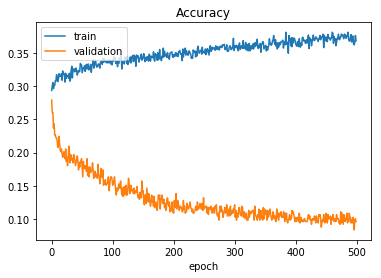

In [199]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [200]:
pd.DataFrame({'Actual Values':np.argmax(y_test,axis=1),'Predicted Values':Pred_keras_inverse})

,Actual Values,Predicted Values
0,53,84
1,75,82
2,1,68
3,97,88
4,40,77
...,...,...
472,99,90
473,83,80
474,97,96
475,87,66


In [193]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(np.argmax(y_test,axis=1), Pred_keras_inverse))
print('MSE:', mean_squared_error(np.argmax(y_test,axis=1), Pred_keras_inverse))
print('RMSE:', np.sqrt(mean_squared_error(np.argmax(y_test,axis=1), Pred_keras_inverse)))
from sklearn.metrics import accuracy_score
print('Accuracy:',100*accuracy_score(np.argmax(y_test,axis=1),Pred_keras_inverse))

MAE: 18.134171907756812
MSE: 672.335429769392
RMSE: 25.929431728624365
Accuracy: 9.224318658280922


In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestRegressor,GradientBoostingRegressor
#rfc,gbc,bc,etc=RandomForestClassifier(n_estimators=10),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier(),RandomForestRegressor()
from sklearn.svm import SVR
svr=SVR()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [34]:
#rfc.fit(X_train,y_train)
#gbc.fit(X_train,y_train)
#bc.fit(X_train,y_train)
#etc.fit(X_train,y_train)
#rfr.fit(X_train,y_train)
svr.fit(X_train,y_train)

#gbr.fit(X_train,y_train)
#pred_rfc=rfc.predict(X_test)
#pred_gbc=gbc.predict(X_test)
#pred_bc=bc.predict(X_test)
#pred_etc=etc.predict(X_test)
#pred_rfr=rfr.predict(X_test)
#pred_gbr=gbr.predict(X_test)
pred_svr=svr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test, np.floor(pred_svr)))
print('MSE:', mean_squared_error(y_test, np.floor(pred_svr)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, np.floor(pred_svr))))


MAE: 24.475524475524477
MSE: 949.0524475524476
RMSE: 30.80669484953632


In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test, np.floor(pred_gbr)))
print('MSE:', mean_squared_error(y_test, np.floor(pred_gbr)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, np.floor(pred_gbr))))


MAE: 14.926624737945493
MSE: 373.70649895178195
RMSE: 19.331489827527054


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test, np.floor(pred_rfr)))
print('MSE:', mean_squared_error(y_test, np.floor(pred_rfr)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, np.floor(pred_rfr))))


MAE: 13.60587002096436
MSE: 337.0901467505241
RMSE: 18.36001488971412


In [83]:
df=pd.DataFrame({'Actual Values':y_test,'Predictions':np.floor(pred_rfr)})
df.as_matrix()

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[75, 64.0],
       [26, 17.0],
       [81, 74.0],
       [57, 52.0],
       [44, 55.0],
       [86, 71.0],
       [85, 53.0],
       [29, 40.0],
       [70, 51.0],
       [1, 6.0],
       [22, 27.0],
       [59, 31.0],
       [89, 84.0],
       [80, 57.0],
       [81, 83.0],
       [55, 25.0],
       [100, 98.0],
       [93, 44.0],
       [90, 75.0],
       [97, 89.0],
       [100, 93.0],
       [77, 5.0],
       [23, 46.0],
       [36, 51.0],
       [13, 33.0],
       [94, 75.0],
       [57, 52.0],
       [79, 79.0],
       [89, 75.0],
       [22, 40.0],
       [49, 90.0],
       [92, 87.0],
       [65, 48.0],
       [52, 56.0],
       [62, 51.0],
       [6, 9.0],
       [77, 80.0],
       [99, 97.0],
       [91, 85.0],
       [93, 79.0],
       [55, 48.0],
       [4, 12.0],
       [61, 73.0],
       [11, 39.0],
       [91, 95.0],
       [79, 73.0],
       [92, 60.0],
       [18, 44.0],
       [86, 80.0],
       [100, 97.0],
       [46, 32.0],
       [100, 98.0],
       [87, 73

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test, pred_rfc))
print('MSE:', mean_squared_error(y_test, pred_rfc))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_rfc)))
from sklearn.metrics import accuracy_score
print('Accuracy:',100*accuracy_score(y_test,pred_rfc))

MAE: 16.834381551362682
MSE: 620.6331236897274
RMSE: 24.91250938162849
Accuracy: 5.870020964360587


In [123]:
df=pd.DataFrame({'Actual Values':y_test,'Predictions':pred_rfc})
pred_rfc

array([ 84,   8,  12,  87,  44, 100,  63,  41,  92,  13,  51,  99,   2,
        95,  77, 100,   9,  88,  47,  53,  85,  88,  63,  13,  86,  87,
        80,  41,  29,  17,   1,  60,  72,  79,  48,  79,  99,  47,   2,
        19,  79,  89,   1,   6,  99,  21,  43,  60, 100,  87,  89,  93,
        63,  63,  30,  93,  44,  71, 100,  92,  80,  46, 100,  93,  91,
        63,  16,  99,  47, 100,  61,  68,  16,  80,  66,  98,  94,  38,
        91,  99,  70,  92,  22,  66, 100,  40,  20, 100,   1,  59,  93,
        51,  29,  35,  87,  37,  97, 100,  63,   1,   8,  15,  77,  91,
        83,  67,  94,  74,  95,  58,  97,  99,  45,  41,  93,  86,  15,
        79,  64,  64,  47,  76,  84,  71,  98,  41,  89,  54,  62,  93,
        93,  45,  94,  59, 100,  96,  58,  35,  78,   3,  41,  15,  30,
         1,  99,  83,  87,   1, 100,  43,  49,  97,  29,  76,   7,  68,
        42,  49,  25,  87,  77,  88,  26,  93,  71, 100,  89,  18,  74,
        42,  79,  94,  80,  85,  79,  81,  40,  69,  44,  89, 10

In [124]:
df.as_matrix()

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 53,  84],
       [ 75,   8],
       [  1,  12],
       [ 97,  87],
       [ 40,  44],
       [100, 100],
       [ 89,  63],
       [ 23,  41],
       [ 97,  92],
       [ 48,  13],
       [ 26,  51],
       [100,  99],
       [ 31,   2],
       [ 96,  95],
       [ 84,  77],
       [100, 100],
       [ 10,   9],
       [ 66,  88],
       [ 53,  47],
       [ 43,  53],
       [ 96,  85],
       [ 91,  88],
       [ 58,  63],
       [ 47,  13],
       [ 71,  86],
       [ 81,  87],
       [ 97,  80],
       [ 45,  41],
       [ 29,  29],
       [ 85,  17],
       [ 27,   1],
       [ 85,  60],
       [ 50,  72],
       [ 88,  79],
       [ 12,  48],
       [ 93,  79],
       [ 98,  99],
       [ 41,  47],
       [ 16,   2],
       [ 31,  19],
       [ 89,  79],
       [ 95,  89],
       [  3,   1],
       [  7,   6],
       [ 99,  99],
       [ 42,  21],
       [ 39,  43],
       [ 34,  60],
       [ 96, 100],
       [ 89,  87],
       [ 78,  89],
       [ 80,  93],
       [ 49,

In [127]:
print('MAE:', mean_absolute_error(y_test, pred_gbc))
print('MSE:', mean_squared_error(y_test, pred_gbc))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_gbc)))
from sklearn.metrics import accuracy_score
print('Accuracy:',100*accuracy_score(y_test,pred_gbc))

MAE: 20.840670859538783
MSE: 877.4025157232704
RMSE: 29.620981005416926
Accuracy: 6.918238993710692


In [128]:
print('MAE:', mean_absolute_error(y_test, pred_bc))
print('MSE:', mean_squared_error(y_test, pred_bc))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_bc)))
from sklearn.metrics import accuracy_score
print('Accuracy:',100*accuracy_score(y_test,pred_bc))

MAE: 16.528301886792452
MSE: 601.3752620545073
RMSE: 24.52295377915367
Accuracy: 8.59538784067086


In [129]:
print('MAE:', mean_absolute_error(y_test, pred_etc))
print('MSE:', mean_squared_error(y_test, pred_etc))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_etc)))
from sklearn.metrics import accuracy_score
print('Accuracy:',100*accuracy_score(y_test,pred_etc))

MAE: 14.234800838574424
MSE: 459.44654088050316
RMSE: 21.434704123931898
Accuracy: 8.385744234800839


In [130]:
df=pd.DataFrame({'Actual Values':y_test,'Predictions':pred_etc})
df.as_matrix()

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 53,  84],
       [ 75,  76],
       [  1,  25],
       [ 97,  87],
       [ 40,  44],
       [100, 100],
       [ 89,  95],
       [ 23,  22],
       [ 97,  92],
       [ 48,  53],
       [ 26,  32],
       [100,  99],
       [ 31,  47],
       [ 96,  95],
       [ 84,  90],
       [100,  98],
       [ 10,   9],
       [ 66,  93],
       [ 53,  47],
       [ 43,  53],
       [ 96,  85],
       [ 91,  91],
       [ 58,  91],
       [ 47,  49],
       [ 71,  86],
       [ 81,  87],
       [ 97,  80],
       [ 45,  41],
       [ 29,   2],
       [ 85,  63],
       [ 27,  49],
       [ 85,  60],
       [ 50,  82],
       [ 88,  94],
       [ 12,  47],
       [ 93,  79],
       [ 98,  99],
       [ 41,  47],
       [ 16,   9],
       [ 31,  19],
       [ 89,  77],
       [ 95,  89],
       [  3,   1],
       [  7,   6],
       [ 99,  98],
       [ 42,  43],
       [ 39,  43],
       [ 34,  76],
       [ 96, 100],
       [ 89,  87],
       [ 78,  87],
       [ 80,  93],
       [ 49,

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.30, random_state=101)

In [67]:
df_bc.as_matrix()

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[43.0, 45.0],
       [88.0, 90.0],
       [77.0, 91.0],
       [81.0, 85.0],
       [63.0, 55.0],
       [87.0, 87.0],
       [75.0, 62.0],
       [65.0, 8.0],
       [85.0, 87.0],
       [21.0, 1.0],
       [70.0, 59.0],
       [70.0, 59.0],
       [63.0, 90.0],
       [95.0, 98.0],
       [97.0, 90.0],
       [99.0, 100.0],
       [82.0, 68.0],
       [92.0, 83.0],
       [39.0, 42.0],
       [73.0, 74.0],
       [94.0, 88.0],
       [7.0, 2.0],
       [65.0, 40.0],
       [95.0, 91.0],
       [36.0, 18.0],
       [98.0, 100.0],
       [90.0, 87.0],
       [27.0, 57.0],
       [68.0, 59.0],
       [14.0, 59.0],
       [10.0, 1.0],
       [63.0, 69.0],
       [88.0, 97.0],
       [35.0, 67.0],
       [79.0, 83.0],
       [76.0, 79.0],
       [87.0, 80.0],
       [1.0, 1.0],
       [33.0, 39.0],
       [77.0, 71.0],
       [62.0, 47.0],
       [68.0, 73.0],
       [97.0, 100.0],
       [41.0, 29.0],
       [1.0, 47.0],
       [53.0, 1.0],
       [13.0, 35.0],
       [74.0, 40.0]

In [180]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((652, 8), (652,), (280, 8), (280,))

In [146]:
filepath=r'C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5'
checkpoint = ModelCheckpoint(filepath, monitor='mse', verbose=1, save_best_only=True, mode='auto')
#early = EarlyStopping(monitor="acc", mode="auto", patience= 10)
callbacks_list = [checkpoint]

In [147]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=32, input_dim=8,kernel_initializer='normal',activation='relu'))
    regressor.add(Dense(units=1,kernel_initializer='normal'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse','accuracy'])
    return regressor

In [148]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor,callbacks=callbacks_list, batch_size=40,epochs=10,verbose=1)

In [209]:
from keras.models import model_from_json

regressor.model.load_weights(filepath)

In [210]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X_transform):
    X_train, y_train, X_test, y_test=X_transform[train_index],y.iloc[train_index],X_transform[test_index],y.iloc[test_index] 
    regressor.fit(X_train,y_train,epochs=10,batch_size=60)

Epoch 1/10
1429/1429 [==============================] - 1s 414us/step - loss: 4765.7425 - mse: 4765.7427 - accuracy: 0.0000e+00

Epoch 00001: mse improved from inf to 4765.74268, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 2/10
1429/1429 [==============================] - 0s 210us/step - loss: 4752.7946 - mse: 4752.7949 - accuracy: 0.0000e+00

Epoch 00002: mse improved from 4765.74268 to 4752.79492, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 3/10
1429/1429 [==============================] - 0s 166us/step - loss: 4728.8690 - mse: 4728.8687 - accuracy: 6.9979e-04

Epoch 00003: mse improved from 4752.79492 to 4728.86865, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 4/10
1429/1429 [==============================] - 0s 107us/step - loss: 4689.1859 - mse: 4689.1855 - accuracy: 0.0245

Epoch 00004: mse improved from 4728.86865 to 4689.18555, saving


Epoch 00001: mse improved from inf to 4782.74854, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 2/10
1429/1429 [==============================] - 0s 76us/step - loss: 4768.9745 - mse: 4768.9746 - accuracy: 0.0000e+00

Epoch 00002: mse improved from 4782.74854 to 4768.97461, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 3/10
1429/1429 [==============================] - 0s 75us/step - loss: 4743.8498 - mse: 4743.8501 - accuracy: 0.0014

Epoch 00003: mse improved from 4768.97461 to 4743.85010, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 4/10
1429/1429 [==============================] - 0s 72us/step - loss: 4704.5353 - mse: 4704.5347 - accuracy: 0.0280

Epoch 00004: mse improved from 4743.85010 to 4704.53467, saving model to C:\Users\Kanishk\Downloads\IE Courses\Data Mining\Project\regressor.h5
Epoch 5/10
1429/1429 [==============================] 

In [211]:
regressor.model.save_weights(filepath)

In [212]:
Pred_keras_regressor=regressor.predict(X_test)

477/477 [==============================] - 0s 87us/step


In [213]:
Pred_keras_regressor_absolute=np.floor(Pred_keras_regressor)

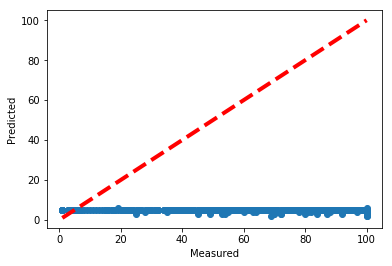

In [214]:
fig, ax = plt.subplots()
ax.scatter(y_test, Pred_keras_regressor_absolute)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test, Pred_keras_regressor_absolute))
print('MSE:', mean_squared_error(y_test, Pred_keras_regressor_absolute))
print('RMSE:', np.sqrt(mean_squared_error(y_test, Pred_keras_regressor_absolute)))
print('Accuracy:',100*accuracy_score(y_test,Pred_keras_regressor_absolute))

MAE: 24.851153039832287
MSE: 840.2138364779875
RMSE: 28.986442287351988
Accuracy: 1.257861635220126


In [166]:
df_keras_reg=pd.DataFrame({'Actual Values':y_test,'Predictions':Pred_keras_regressor_absolute})

In [167]:
df_keras_reg.as_matrix()

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 53.,  51.],
       [ 75.,  58.],
       [  1.,  64.],
       [ 97.,  62.],
       [ 40.,  64.],
       [100.,  65.],
       [ 89.,  62.],
       [ 23.,  64.],
       [ 97.,  65.],
       [ 48.,  64.],
       [ 26.,  64.],
       [100.,  45.],
       [ 31.,  62.],
       [ 96.,  64.],
       [ 84.,  63.],
       [100.,  63.],
       [ 10.,  62.],
       [ 66.,  61.],
       [ 53.,  64.],
       [ 43.,  64.],
       [ 96.,  64.],
       [ 91.,  64.],
       [ 58.,  61.],
       [ 47.,  64.],
       [ 71.,  58.],
       [ 81.,  56.],
       [ 97.,  64.],
       [ 45.,  60.],
       [ 29.,  61.],
       [ 85.,  59.],
       [ 27.,  63.],
       [ 85.,  65.],
       [ 50.,  62.],
       [ 88.,  59.],
       [ 12.,  58.],
       [ 93.,  65.],
       [ 98.,  64.],
       [ 41.,  64.],
       [ 16.,  65.],
       [ 31.,  64.],
       [ 89.,  61.],
       [ 95.,  60.],
       [  3.,  64.],
       [  7.,  64.],
       [ 99.,  65.],
       [ 42.,  65.],
       [ 39.,  64.],
       [ 34.,

In [272]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,Pred_keras_regressor_absolute)

array([[[279,   1],
        [  0,   0]],

       [[274,   0],
        [  6,   0]],

       [[278,   0],
        [  2,   0]],

       [[279,   0],
        [  1,   0]],

       [[278,   0],
        [  2,   0]],

       [[278,   0],
        [  2,   0]],

       [[275,   1],
        [  4,   0]],

       [[275,   1],
        [  4,   0]],

       [[278,   0],
        [  2,   0]],

       [[278,   0],
        [  2,   0]],

       [[279,   0],
        [  1,   0]],

       [[277,   1],
        [  2,   0]],

       [[278,   0],
        [  2,   0]],

       [[278,   0],
        [  2,   0]],

       [[279,   1],
        [  0,   0]],

       [[277,   2],
        [  1,   0]],

       [[278,   1],
        [  1,   0]],

       [[277,   2],
        [  1,   0]],

       [[276,   2],
        [  2,   0]],

       [[275,   1],
        [  4,   0]],

       [[277,   1],
        [  2,   0]],

       [[275,   5],
        [  0,   0]],

       [[279,   1],
        [  0,   0]],

       [[275,   4],
        [  1, 

In [11]:
a=[0,1,2,3,4,8,9,10,16,18,19,20,21,22,23]

In [17]:
for i in range(len(a)):
     a[i]=a[i]+1

In [18]:
a

[1, 2, 3, 4, 5, 9, 10, 11, 17, 19, 20, 21, 22, 23, 24]